# ISA: Example of usage

International Standard Atmosphere refers to the US Atmosphere of 1975 coefficients (COESA 1975).

From troposphere to mesosphere (0 m to 84851 m) temperature, pressure and density are depicted below.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pyturb.gas_models import isa

In [2]:
height = [0, 11000, 20000, 32000, 47000, 51000, 71000, 84852]
for i_layer, h in enumerate(height):
    lapse_rate, Tbase, pbase, dbase, heightbase, layer_name = isa.get_atmosdata(h)
    print('{5} -{4:>14s} - zbase={3:9.3f}m, alpha={0:9.2e}K/m, Tbase={1:6.2f}K, pbase={2:10.3f}Pa, dbase={6:6.3e}kg/m^3'.format(lapse_rate, Tbase, pbase, heightbase, layer_name, i_layer+1, dbase))

1 -   troposphere - zbase=    0.000m, alpha=-6.50e-03K/m, Tbase=288.15K, pbase=101325.000Pa, dbase=1.225e+00kg/m^3
2 -    tropopause - zbase=11000.000m, alpha= 0.00e+00K/m, Tbase=216.65K, pbase= 22632.000Pa, dbase=3.639e-01kg/m^3
3 - stratosphere1 - zbase=20000.000m, alpha= 1.00e-03K/m, Tbase=216.65K, pbase=  5474.900Pa, dbase=8.803e-02kg/m^3
4 - stratosphere2 - zbase=32000.000m, alpha= 2.80e-03K/m, Tbase=228.65K, pbase=   868.020Pa, dbase=1.323e-02kg/m^3
5 -   stratopause - zbase=47000.000m, alpha= 0.00e+00K/m, Tbase=270.65K, pbase=   110.910Pa, dbase=1.428e-03kg/m^3
6 -   mesosphere1 - zbase=51000.000m, alpha=-2.80e-03K/m, Tbase=270.65K, pbase=    66.939Pa, dbase=8.616e-04kg/m^3
7 -   mesosphere2 - zbase=71000.000m, alpha=-2.00e-03K/m, Tbase=214.65K, pbase=     3.956Pa, dbase=6.421e-05kg/m^3
8 -   mesosphere3 - zbase=84852.000m, alpha= 0.00e+00K/m, Tbase=186.95K, pbase=     0.373Pa, dbase=6.958e-06kg/m^3


In [3]:
h = np.linspace(0,84851, 100)
T = isa.temperature_isa(h)
p = isa.pressure_isa(h)
d = isa.density_state_eq(h)

Text(0, 0.5, 'geopotential height [m]')

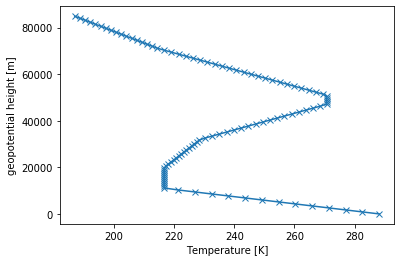

In [4]:
plt.figure()
plot_temp = plt.plot(T,h, '-x')
plt.xlabel("Temperature [K]")
plt.ylabel("geopotential height [m]")

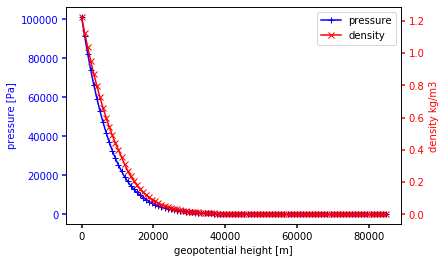

In [5]:
fig, eje1 = plt.subplots()
eje2 = eje1.twinx()
plot1, = eje1.plot(h, p, "b-+", label="pressure")
plot2, = eje2.plot(h, d, "r-x", label="density")

eje1.set_xlabel("geopotential height [m]")
eje1.set_ylabel("pressure [Pa]")
eje2.set_ylabel("density kg/m3")
eje1.yaxis.label.set_color(plot1.get_color())
eje2.yaxis.label.set_color(plot2.get_color())

tkw = dict(size=4, width=1.5)
eje1.tick_params(axis='y', colors=plot1.get_color(), **tkw)
eje2.tick_params(axis='y', colors=plot2.get_color(), **tkw)
eje1.tick_params(axis='x', **tkw)

lines = [plot1, plot2]
eje1.legend(lines, [l.get_label() for l in lines])

In [6]:
isa.height_from_temperature_isa(270)

array([ 2792.30769231, 46767.85714286, 51232.14285714])

In [7]:
isa.height_from_pressure_isa([50000, 95000, 2500])

array([ 5574.43747451,   540.33747904, 25028.56008313])

In [8]:
isa.height_from_temperature_isa([200, 220, 250, 275])

array([array([78325.]),
       array([10484.61538462, 23350.        , 69089.28571429]),
       array([ 5869.23076923, 39625.        , 58375.        ]),
       array([2023.07692308])], dtype=object)

In [9]:
print(isa.temperature_isa([0, 1000, 2000, 3000]))
print(isa.temperature_isa([0, 1000, 2000, 3000], [5, 10, 15, 20]))

[288.15 281.65 275.15 268.65]
[293.15 291.65 290.15 288.65]


In [10]:
print(isa.pressure_isa([5000, 8000, 10000, 0]))
print(isa.pressure_isa([5000, 8000, 10000, 0], [5, 10, 15, 20]))

[ 54019.91210376  35599.81142263  26436.26759381 101325.        ]
[ 59808.91814357  44270.65635858  37213.28921173 144175.50822339]


In [11]:
T75 = isa.temperature_isa(7500)
print(T75)
T90 = isa.temperature_isa(9000, 10)
print(T90)

239.39999999999998
239.64999999999998


In [12]:
p75 = isa.pressure_isa(7500)
p90 = isa.pressure_isa(9000,10)
print(p75)
print(p90)

38251.42414215849
38461.83768243645


In [13]:
hp75 = isa.height_from_pressure_isa(p75)
hp90 = isa.height_from_pressure_isa(p90, 10)
print(hp75)
print(hp90)

7500.000000000005
9000.0
